# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://raw.githubusercontent.com/suneman/socialgraphs2025/main/files/rock.png "Great image choice, Sune")

Today, we will use network science and Wikipedia to learn about the relationships of **[Rock Bands & Performers](https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers)**. 

To create the network, we will download the Wikipedia pages for all people in the list. Next, we create the network of the pages that link to each other. We can do this because wikipedia pages link to one another. So [The Beatles](https://en.wikipedia.org/wiki/The_Beatles) links to [the Kinks](https://en.wikipedia.org/wiki/The_Kinks), for example.

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to extract information from the text displayed on those pages.

But for today, the tasks are:

* Learn about regular expressions.
* Download and store (for later use) all the performer-pages from Wikipedia.
* Extract all the internal wikipedia-links that connect the performers on Wikipedia.
* Generate the network of performers on wikipedia.
* Calculate some simple network statistics.
* Create a simple plot

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us. Up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links (links between wiki-pages). And for that we need regular expressions.

<div class="alert alert-block alert-info">
The recipe below is what I told the class to do before LLMs. If you want to try to learn about regular expressions on your own, that's what you need to do. <b>BUT!</b> You don't have to. <b>For this part, it's OK to use an LLM to help you as much as you possibly can.</b> The reason I'm saying this is that I don't think having an intimate knowledge of regular expressions is important for the content of this class.
</div>
<div class="alert alert-block alert-info">
That said, <b>using an LLM means that you have to do extra checking and testing</b>. Make sure that the code you get from your LLM actually does what you asked it to do by going through some examples and manually checking (use a real wiki page or the test-text below). If your LLM hallucinated the wrong answer and you still use the data that comes out, it will count negatively in our evaluations.
</div>

> *Reading/Video*
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples. 
> * (**Experiment**: An alternative to reading. If you love videos more than reading, you can also check out [this YouTube explainer video](https://www.youtube.com/watch?v=rhzKDrUiJVk) instead of going through the tutorial above -- it's a friendly looking young man called Kyle who goes through RegExps from his bedroom. I haven't watched the whole thing ... since I personally don't like video explainers ... but it has many views + thumbs up.)

> _Exercises_: Regular expressions round 1\.
> * Now, explain in your own words: what are regular expressions?
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 

Now we can go on to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/John_McCain). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

## _Exercises_: Regular expressions round 1\.

In [99]:
import re 

# Open file in read mode
f = open("data/regex_exercise.txt", 'r')

### Now, explain in your own words: what are regular expressions?

**Answer**\
Regular expression is a program, where it is possible to search though text, by using some different characters to search in the text.  

### Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.

**Answer**\
`\d{4}`

This is giving 4 digits, but here we also can find 4 digits in a number that is longer than 4 digits. 

<img src="SymPyBilleder/2025-09-24-10-33-35.png" width="350">

In [100]:
digits = re.findall(r'\d{4}', f.read())
print(digits)

['1234', '9999', '2345']


So to find exact 4 digits we use:

In [101]:
exact_four_digits = re.findall(r'\b\d{4}\b', open("data/regex_exercise.txt", 'r').read())
print(exact_four_digits)

['1234', '9999']


<img src="SymPyBilleder/2025-09-24-10-34-48.png" width="150">

This did not give us the number of 4 or more. But only exact 4 digits. 

`\b ... \b` is a word boundary.

### Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).



In [102]:
super = re.findall(r'super\w+', open("data/regex_exercise.txt", 'r').read())
print(super)

['superpolaroid', 'supertaxidermy', 'superbeer']


`\w` \ 
any word character. 

And after that I put on `+`, so I also get the letters after `super`. 

## _Exercise_: Regular expressions round 2\. 

### Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.

In [103]:
wiki_links = re.findall(r'\[\[(.+?)\]\]', open("data/regex_exercise.txt", 'r').read())
print(wiki_links)

['drinking vinegar', 'gentrify', 'hashtag', 'Bicycle|Bicycle(two-wheeled type)', 'Pitchfork|Pitchfork Magazine']


---

# Part 1: Download the Wikipedia pages of characters

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you re-watch the **APIs video lecture** from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). I've included it below for your covenience.

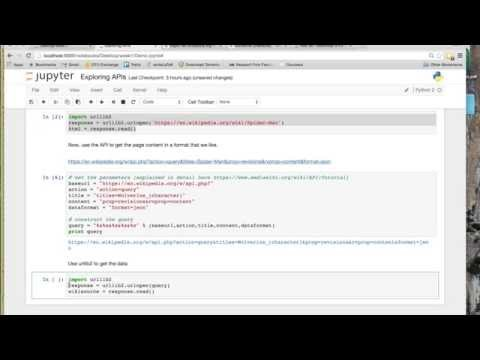

In [104]:
from IPython.display import YouTubeVideo
YouTubeVideo("9l5zOfh0CRo",width=800, height=450)

Now, it's time to go and get the names of all the wiki pages you'll need for your analysis. Those will serve as the nodes in our network. 

*Exercise*
> * Go to the page https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers and extract all of the artist-links using your regular expressions from above.
>   * Hint: To make this easier, you can simply hit the edit button on wikipedia, copy the entire content of the file to a plain text file on your computer and manually delete all of the markup that's not related to the artists' names. (Otherwise there are some wiki-links there that you don't want)

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM as much as you can here. But you should double check that it actually does what you want and all that stuff.
</div>

#### A note to the perfectionists out there
The files contain names and corresponding wiki-link, but pages can be missing or redirected. If you encounter re-directs, you can follow the redirect link and see if you can recover a page that's not already in your database.  (But you do not have to do that either - it's fine to just skip ... many new issues can arise if you try to follow the redirects).

#### Back to our regularly scheduled programming

With the list from the exercise above, you now have all of the nodes in the network.

*Exercise*

> * Use your knowledge of APIs and the list of all the wiki-pages to download all the text on the pages of the country performers. 
>   - Hint 0: Make sure you read the [Wiki API pages](https://www.mediawiki.org/wiki/API:Main_page) to ensure that your **download the cleanest possible version of the page (the wikitext)**. [This link](https://stackoverflow.com/questions/55779015/get-wikitext-from-wikipedia-api) may be helpful.
>   - Hint 1: You may want to save the individual band/artist pages on your computer. You can use your skills from the first lectures to write them as plain-text files (that's what I would do - one file per band/artist, named according to its wiki-link). (But you can also use pickle files or start a database if you like that better.)
>   - Hint 2: If you now have a directory with all those files, you can use [`os.listdir()`](https://www.geeksforgeeks.org/python-os-listdir-method/) to list all the files in that directory within Python and iterate over the files if you need to.
>   - Hint 3: Don't forget to add underscores to the performer names when you construct the urls

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM here.
</div>

## _Exercise_

### Go to the page https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers and extract all of the artist-links using your regular expressions from above.

* Hint: To make this easier, you can simply hit the edit button on wikipedia, copy the entire content of the file to a plain text file on your computer and manually delete all of the markup that's not related to the artists' names. (Otherwise there are some wiki-links there that you don't want)

In [105]:
import urllib.request

baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
title = "titles=List_of_mainstream_rock_performers"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"

query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
print(query)

https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=List_of_mainstream_rock_performers&format=json


In [106]:
import json

requestwiki = urllib.request.Request(query, headers={'User-Agent': 'Mozilla/5.0'})
wikiresponse = urllib.request.urlopen(requestwiki)
wikidata = wikiresponse.read()
wikitext_rock = wikidata.decode('utf-8')
print(json.loads(wikitext_rock))

{'batchcomplete': '', 'warnings': {'main': {'*': 'Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application.'}, 'revisions': {'*': 'Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used.'}}, 'query': {'normalized': [{'from': 'List_of_mainstream_rock_performers', 'to': 'List of mainstream rock performers'}], 'pages': {'68324070': {'pageid': 68324070, 'ns': 0, 'title': 'List of mainstream rock performers', 'revisions': [{'contentformat': 'text/x-wiki', 'contentmodel': 'wikitext', '*': "{{short description|None}}\n\nThis is an alphabetical '''list of mainstream rock performers''' spanning all subgenres and fusions within the genre of [[rock music]].  Artist

In [107]:
# Now we find all wiki links:
all_wiki_links_rock = re.findall(r"\[\[(.*?)\]\]", wikitext_rock) # I added () for the link itself
all_wiki_links_rock

['Special:ApiFeatureUsage',
 'rock music',
 '10cc',
 '10 Years (band)|10 Years',
 '3 Doors Down',
 '311 (band)|311',
 '38 Special (band)|.38 Special',
 'ABBA',
 'Accept (band)|Accept',
 'AC/DC',
 'Bryan Adams',
 'Aerosmith',
 'AFI (band)|AFI',
 'Air Supply',
 'The Alan Parsons Project',
 'Alice in Chains',
 'The All-American Rejects',
 'The Allman Brothers Band',
 'Alter Bridge',
 'Ambrosia (band)|Ambrosia',
 'America (band)|America',
 'The Animals',
 'Adam Ant',
 'Anthrax (American band)|Anthrax',
 'April Wine',
 'Arcade Fire',
 'Arctic Monkeys',
 'Asia (band)|Asia',
 'Audioslave',
 'Avenged Sevenfold',
 'Awolnation',
 "The B-52's|The B-52s",
 'Bachman\\u2013Turner Overdrive',
 'Bad Company',
 'Badfinger',
 'The Band',
 'The Bangles',
 'Barenaked Ladies',
 'Bay City Rollers',
 'The Beach Boys',
 'Beastie Boys',
 'The Beatles',
 'Bee Gees',
 'Beck',
 'Ben Folds Five',
 'Pat Benatar',
 'Chuck Berry',
 'The Big Bopper',
 'Billy Talent',
 'The Black Crowes',
 'The Black Keys',
 'Black Sab

In [108]:
rock_performance = []
for link in all_wiki_links_rock:
    if "File" not in link and "Special:" not in link and "rock music" not in link and "Image:" not in link and "Category:" not in link and "AllMusic" not in link and "Template:" not in link and "Help:" not in link and "Portal:" not in link and "Talk:" not in link:
        rock_performance.append(link) 
rock_performance

['10cc',
 '10 Years (band)|10 Years',
 '3 Doors Down',
 '311 (band)|311',
 '38 Special (band)|.38 Special',
 'ABBA',
 'Accept (band)|Accept',
 'AC/DC',
 'Bryan Adams',
 'Aerosmith',
 'AFI (band)|AFI',
 'Air Supply',
 'The Alan Parsons Project',
 'Alice in Chains',
 'The All-American Rejects',
 'The Allman Brothers Band',
 'Alter Bridge',
 'Ambrosia (band)|Ambrosia',
 'America (band)|America',
 'The Animals',
 'Adam Ant',
 'Anthrax (American band)|Anthrax',
 'April Wine',
 'Arcade Fire',
 'Arctic Monkeys',
 'Asia (band)|Asia',
 'Audioslave',
 'Avenged Sevenfold',
 'Awolnation',
 "The B-52's|The B-52s",
 'Bachman\\u2013Turner Overdrive',
 'Bad Company',
 'Badfinger',
 'The Band',
 'The Bangles',
 'Barenaked Ladies',
 'Bay City Rollers',
 'The Beach Boys',
 'Beastie Boys',
 'The Beatles',
 'Bee Gees',
 'Beck',
 'Ben Folds Five',
 'Pat Benatar',
 'Chuck Berry',
 'The Big Bopper',
 'Billy Talent',
 'The Black Crowes',
 'The Black Keys',
 'Black Sabbath',
 'Black Stone Cherry',
 'Black Veil 

In [109]:
rock_titles = []

for rock_performer in rock_performance:
    # 1) Take only the part after the last '|'
    if "|" in rock_performer:
        rock_parts = rock_performer.split("|")
        rock_right_side = rock_parts[-1]   # last chunk after the final '|'
    else:
        rock_right_side = rock_performer   # no '|' at all

    # 2) Replace spaces with underscores
    rock_no_spaces = rock_right_side.replace(" ", "_")

    # 3) Remove backslashes
    rock_cleaned = rock_no_spaces.replace("\\", "")

    # 4) Add to the result list
    rock_titles.append(rock_cleaned)
    
rock_titles

['10cc',
 '10_Years',
 '3_Doors_Down',
 '311',
 '.38_Special',
 'ABBA',
 'Accept',
 'AC/DC',
 'Bryan_Adams',
 'Aerosmith',
 'AFI',
 'Air_Supply',
 'The_Alan_Parsons_Project',
 'Alice_in_Chains',
 'The_All-American_Rejects',
 'The_Allman_Brothers_Band',
 'Alter_Bridge',
 'Ambrosia',
 'America',
 'The_Animals',
 'Adam_Ant',
 'Anthrax',
 'April_Wine',
 'Arcade_Fire',
 'Arctic_Monkeys',
 'Asia',
 'Audioslave',
 'Avenged_Sevenfold',
 'Awolnation',
 'The_B-52s',
 'Bachmanu2013Turner_Overdrive',
 'Bad_Company',
 'Badfinger',
 'The_Band',
 'The_Bangles',
 'Barenaked_Ladies',
 'Bay_City_Rollers',
 'The_Beach_Boys',
 'Beastie_Boys',
 'The_Beatles',
 'Bee_Gees',
 'Beck',
 'Ben_Folds_Five',
 'Pat_Benatar',
 'Chuck_Berry',
 'The_Big_Bopper',
 'Billy_Talent',
 'The_Black_Crowes',
 'The_Black_Keys',
 'Black_Sabbath',
 'Black_Stone_Cherry',
 'Black_Veil_Brides',
 'Blink-182',
 'Blondie_(band)',
 'Bloodhound_Gang',
 'Blue_October',
 'Blue_u00d6yster_Cult',
 'Blues_Traveler',
 'James_Blunt',
 'Blur',
 '

In [110]:
queries_rock = []

for wikipages_rock in rock_titles:
    baseurl = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    title = "titles="+urllib.parse.quote(wikipages_rock)
    content = "prop=revisions&rvprop=content"
    dataformat ="format=json"

    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)

    queries_rock.append(query)

queries_rock

['https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=10cc&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=10_Years&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=3_Doors_Down&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=311&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=.38_Special&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=ABBA&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Accept&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=AC/DC&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Bryan_Adams&format=json',
 'https://en.wikip

In [111]:
import os
import pickle

# Directory:
save_dir = "../data/rock_performers/"
os.makedirs(save_dir, exist_ok=True)

# Counter to keep track of progress:
counter = 0

def safe_filename(title):
    # replace all characters that are invalid in filenames with "_"
    return re.sub(r'[\\/*?:"<>|]', "_", title).replace(" ", "_")

for query in queries_rock:
    try:
        # From week 1:
        requestwiki = urllib.request.Request(query, headers={'User-Agent': 'Mozilla/5.0'})
        wikiresponse = urllib.request.urlopen(requestwiki)
        wikidata = wikiresponse.read()
        data = json.loads(wikidata.decode('utf-8'))

        # Extract the page:
        page = next(iter(data["query"]["pages"].values()))
        page_title = page["title"]

        # Check if revisions exist:
        revisions = page.get("revisions", [])
        if not revisions:
            print(f"Skipped (no revisions): {page_title}")
            continue

        rev = revisions[0]
        if "slots" in rev:   # modern
            wikitext = rev["slots"]["main"]["content"]
        else:                # legacy
            wikitext = rev.get("*", "")

        if not wikitext:
            print(f"No content found for {page_title}")
            continue

        filename = safe_filename(page_title)
        file_path = os.path.join(save_dir, f"{filename}.pkl")  # use .pkl instead of .txt

        with open(file_path, "wb") as f:
            pickle.dump(wikitext, f)

        counter += 1
        print(f"Saved {file_path} ({counter}/{len(queries_rock)})")

    except Exception as e:
         print(f"Failed for query {query}: {e}")

Saved ../data/rock_performers/10cc.pkl (1/488)
Saved ../data/rock_performers/10_Years.pkl (2/488)
Saved ../data/rock_performers/3_Doors_Down.pkl (3/488)
Saved ../data/rock_performers/311.pkl (4/488)
Saved ../data/rock_performers/.38_Special.pkl (5/488)
Saved ../data/rock_performers/ABBA.pkl (6/488)
Saved ../data/rock_performers/Accept.pkl (7/488)
Saved ../data/rock_performers/AC_DC.pkl (8/488)
Saved ../data/rock_performers/Bryan_Adams.pkl (9/488)
Saved ../data/rock_performers/Aerosmith.pkl (10/488)
Saved ../data/rock_performers/AFI.pkl (11/488)
Saved ../data/rock_performers/Air_Supply.pkl (12/488)
Saved ../data/rock_performers/The_Alan_Parsons_Project.pkl (13/488)
Saved ../data/rock_performers/Alice_in_Chains.pkl (14/488)
Saved ../data/rock_performers/The_All-American_Rejects.pkl (15/488)
Saved ../data/rock_performers/The_Allman_Brothers_Band.pkl (16/488)
Saved ../data/rock_performers/Alter_Bridge.pkl (17/488)
Saved ../data/rock_performers/Ambrosia.pkl (18/488)
Saved ../data/rock_perfo

### Use your knowledge of APIs and the list of all the wiki-pages to download all the text on the pages of the country performers. 
- Hint 0: Make sure you read the [Wiki API pages](https://www.mediawiki.org/wiki/API:Main_page) to ensure that your **download the cleanest possible version of the page (the wikitext)**. [This link](https://stackoverflow.com/questions/55779015/get-wikitext-from-wikipedia-api) may be helpful.
- Hint 1: You may want to save the individual band/artist pages on your computer. You can use your skills from the first lectures to write them as plain-text files (that's what I would do - one file per band/artist, named according to its wiki-link). (But you can also use pickle files or start a database if you like that better.)
- Hint 2: If you now have a directory with all those files, you can use [`os.listdir()`](https://www.geeksforgeeks.org/python-os-listdir-method/) to list all the files in that directory within Python and iterate over the files if you need to.
- Hint 3: Don't forget to add underscores to the performer names when you construct the urls

In [112]:
import urllib.request

baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
title = "titles=List_of_country_music_performers"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"

query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
print(query)

https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=List_of_country_music_performers&format=json


In [113]:
import json

requestwiki = urllib.request.Request(query, headers={'User-Agent': 'Mozilla/5.0'})
wikiresponse = urllib.request.urlopen(requestwiki)
wikidata = wikiresponse.read()
wikitext_country = wikidata.decode('utf-8')
print(json.loads(wikitext_country))

{'batchcomplete': '', 'warnings': {'main': {'*': 'Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application.'}, 'revisions': {'*': 'Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used.'}}, 'query': {'normalized': [{'from': 'List_of_country_music_performers', 'to': 'List of country music performers'}], 'pages': {'328877': {'pageid': 328877, 'ns': 0, 'title': 'List of country music performers', 'revisions': [{'contentformat': 'text/x-wiki', 'contentmodel': 'wikitext', '*': '{{Short description|none}}\n{{see also|Country music|List of country performers by era|List of Country Music Hall of Fame inductees|Popular music|List of popular music performers}}\n{

In [114]:
# Now we find all wiki links:
all_wiki_links_country = re.findall(r"\[\[(.*?)\]\]", wikitext_country) # I added () for the link itself
all_wiki_links_country

['Special:ApiFeatureUsage',
 'country music',
 '3 of Hearts (band)|3 of Hearts',
 '4 Runner',
 '8 Ball Aitken',
 'File:Gene Autry.JPG|thumb|right|140px|[[Gene Autry',
 'File:Eddie Arnold 1969.JPG|thumb|right|140px|[[Eddy Arnold',
 'File:Roy Acuff 1950.JPG|thumb|right|140px|[[Roy Acuff',
 'File:Rodney Atkins pointing up.jpg|thumb|right|140px|[[Rodney Atkins',
 'The Abrams Brothers',
 'Ace in the Hole Band',
 'Roy Acuff',
 'Kay Adams (singer)|Kay Adams',
 'Ryan Adams',
 'Doug Adkins',
 'Trace Adkins',
 'David \\"Stringbean\\" Akeman',
 'Rhett Akins',
 'Alabama (band)|Alabama',
 'Lauren Alaina',
 'Jason Aldean',
 'Alee (singer)|Alee',
 'Daniele Alexander',
 'Jessi Alexander',
 'Gary Allan',
 'Susie Allanson',
 'Deborah Allen',
 'Duane Allen',
 'Harley Allen',
 'Jimmie Allen',
 'Rex Allen',
 'Terry Allen (country singer)|Terry Allen',
 'Allman Brothers Band',
 'Gregg Allman',
 'Tommy Alverson',
 'Dave Alvin',
 'Amazing Rhythm Aces',
 'American Young',
 'Don Amero',
 'Colin Amey',
 'Al Ande

In [115]:
country_performance = []
for link in all_wiki_links_country:
    if "File" not in link and "Special:" not in link and "country music" not in link and "Image:" not in link and "Category:" not in link:
        country_performance.append(link) 
country_performance

['3 of Hearts (band)|3 of Hearts',
 '4 Runner',
 '8 Ball Aitken',
 'The Abrams Brothers',
 'Ace in the Hole Band',
 'Roy Acuff',
 'Kay Adams (singer)|Kay Adams',
 'Ryan Adams',
 'Doug Adkins',
 'Trace Adkins',
 'David \\"Stringbean\\" Akeman',
 'Rhett Akins',
 'Alabama (band)|Alabama',
 'Lauren Alaina',
 'Jason Aldean',
 'Alee (singer)|Alee',
 'Daniele Alexander',
 'Jessi Alexander',
 'Gary Allan',
 'Susie Allanson',
 'Deborah Allen',
 'Duane Allen',
 'Harley Allen',
 'Jimmie Allen',
 'Rex Allen',
 'Terry Allen (country singer)|Terry Allen',
 'Allman Brothers Band',
 'Gregg Allman',
 'Tommy Alverson',
 'Dave Alvin',
 'Amazing Rhythm Aces',
 'American Young',
 'Don Amero',
 'Colin Amey',
 'Al Anderson (NRBQ)|Al Anderson',
 'Bill Anderson',
 'Brent Anderson (singer)|Brent Anderson',
 'Coffey Anderson',
 'John Anderson (singer)|John Anderson',
 'Keith Anderson',
 'Liz Anderson',
 'Lynn Anderson',
 'Sharon Anderson (singer)|Sharon Anderson',
 'Elisabeth Andreassen',
 'Ingrid Andress',
 'Co

In [116]:
country_titles = []

for country_performer in country_performance:
    # 1) Take only the part after the last '|'
    if "|" in country_performer:
        country_parts = country_performer.split("|")
        country_right_side = country_parts[-1]   # last chunk after the final '|'
    else:
        country_right_side = country_performer   # no '|' at all

    # 2) Replace spaces with underscores
    country_no_spaces = country_right_side.replace(" ", "_")

    # 3) Remove backslashes
    country_cleaned = country_no_spaces.replace("\\", "")

    # 4) Add to the result list
    country_titles.append(country_cleaned)
    
country_titles

['3_of_Hearts',
 '4_Runner',
 '8_Ball_Aitken',
 'The_Abrams_Brothers',
 'Ace_in_the_Hole_Band',
 'Roy_Acuff',
 'Kay_Adams',
 'Ryan_Adams',
 'Doug_Adkins',
 'Trace_Adkins',
 'David_"Stringbean"_Akeman',
 'Rhett_Akins',
 'Alabama',
 'Lauren_Alaina',
 'Jason_Aldean',
 'Alee',
 'Daniele_Alexander',
 'Jessi_Alexander',
 'Gary_Allan',
 'Susie_Allanson',
 'Deborah_Allen',
 'Duane_Allen',
 'Harley_Allen',
 'Jimmie_Allen',
 'Rex_Allen',
 'Terry_Allen',
 'Allman_Brothers_Band',
 'Gregg_Allman',
 'Tommy_Alverson',
 'Dave_Alvin',
 'Amazing_Rhythm_Aces',
 'American_Young',
 'Don_Amero',
 'Colin_Amey',
 'Al_Anderson',
 'Bill_Anderson',
 'Brent_Anderson',
 'Coffey_Anderson',
 'John_Anderson',
 'Keith_Anderson',
 'Liz_Anderson',
 'Lynn_Anderson',
 'Sharon_Anderson',
 'Elisabeth_Andreassen',
 'Ingrid_Andress',
 'Courtney_Marie_Andrews',
 'Jessica_Andrews',
 'Sheila_Andrews',
 'Lisa_Angelle',
 'Michaela_Anne',
 'Lorenzo_Antonio',
 'Archer/Park',
 'Katie_Armiger',
 'Eddy_Arnold',
 'Ashley_Arrison',
 'Ten

In [117]:
queries_country = []

for wikipages_country in country_titles:
    baseurl = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    title = "titles="+urllib.parse.quote(wikipages_country)
    content = "prop=revisions&rvprop=content"
    dataformat ="format=json"

    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)

    queries_country.append(query)

queries_country

['https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=3_of_Hearts&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=4_Runner&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=8_Ball_Aitken&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=The_Abrams_Brothers&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Ace_in_the_Hole_Band&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Roy_Acuff&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Kay_Adams&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Ryan_Adams&format=json',
 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&title

In [118]:
# Directory:
save_dir = "../data/rock_performers/"
os.makedirs(save_dir, exist_ok=True)

# Counter to keep track of progress:
counter = 0

def safe_filename(title):
    # replace all characters that are invalid in filenames with "_"
    return re.sub(r'[\\/*?:"<>|]', "_", title).replace(" ", "_")

for query in queries_country:
    try:
        # From week 1:
        requestwiki = urllib.request.Request(query, headers={'User-Agent': 'Mozilla/5.0'})
        wikiresponse = urllib.request.urlopen(requestwiki)
        wikidata = wikiresponse.read()
        data = json.loads(wikidata.decode('utf-8'))

        # Extract the page:
        page = next(iter(data["query"]["pages"].values()))
        page_title = page["title"]

        # Check if revisions exist:
        revisions = page.get("revisions", [])
        if not revisions:
            print(f"Skipped (no revisions): {page_title}")
            continue

        rev = revisions[0]
        if "slots" in rev:   # modern
            wikitext = rev["slots"]["main"]["content"]
        else:                # legacy
            wikitext = rev.get("*", "")

        if not wikitext:
            print(f"No content found for {page_title}")
            continue

        filename = safe_filename(page_title)
        file_path = os.path.join(save_dir, f"{filename}.pkl")  # use .pkl instead of .txt

        with open(file_path, "wb") as f:
            pickle.dump(wikitext, f)

        counter += 1
        print(f"Saved {file_path} ({counter}/{len(queries_country)})")

    except Exception as e:
        print(f"Failed for query {query}: {e}")

Saved ../data/rock_performers/3_of_Hearts.pkl (1/2107)
Saved ../data/rock_performers/4_Runner.pkl (2/2107)
Saved ../data/rock_performers/8_Ball_Aitken.pkl (3/2107)
Saved ../data/rock_performers/The_Abrams_Brothers.pkl (4/2107)
Saved ../data/rock_performers/Ace_in_the_Hole_Band.pkl (5/2107)
Saved ../data/rock_performers/Roy_Acuff.pkl (6/2107)
Saved ../data/rock_performers/Kay_Adams.pkl (7/2107)
Saved ../data/rock_performers/Ryan_Adams.pkl (8/2107)
Saved ../data/rock_performers/Doug_Adkins.pkl (9/2107)
Saved ../data/rock_performers/Trace_Adkins.pkl (10/2107)
Saved ../data/rock_performers/David__Stringbean__Akeman.pkl (11/2107)
Saved ../data/rock_performers/Rhett_Akins.pkl (12/2107)
Saved ../data/rock_performers/Alabama.pkl (13/2107)
Saved ../data/rock_performers/Lauren_Alaina.pkl (14/2107)
Saved ../data/rock_performers/Jason_Aldean.pkl (15/2107)
Saved ../data/rock_performers/Alee.pkl (16/2107)
Saved ../data/rock_performers/Daniele_Alexander.pkl (17/2107)
Saved ../data/rock_performers/Jes

---

# Part 2: Building the networks

Now, we're going to build a single NetworkX directed graph with all the rock performers. (We are analyzing a network of bands/artists/perfomers. I'll use all of those interchangably below). 

The nodes in the network will be all the performers, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

The overall plan of attack for this is the following: 
* Take the pages you have downloaded for each performer. 
* Each page corresponds to a performer (= a node in your network). 
* Find all the links in a performers page that link to another node of the network (= some other performer). 
* There are many ways to do this, but below, I've tried to break it down into natural steps. 


*Exercise*: Build the network of Rock Performers 

> Now we can build the network. Here are the instructions.
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
>   - Start by making a single page work. Do some debugging to make sure it's actually working.
>   - Then slowly build the loops over performers/pages to take your little operation to industrial scale
>   - You don't have to be perfect. There will be tricky edge-cases, you don't have to solve all of those. The key is to get a pretty good network to work with, not to make everything perfect.
> * For each link you extract, check if the target is a person from your list of performers. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) to store the network.
> * Store the `length of the content` as an attribute of the node (i.e. count the number of *words* you have in each character's page). By storing this information as a nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use `regex`, but simpler methods are OK.
> * When have you finished, you'll notice that some nodes do not have any out- and in- degrees. Unless you've made a mistake, those are truly isolated bands/singers. Double check for mistakes, then *discard* those disconnected nodes from the network.
> * Finally, extract the largest component - it will make our work with visualisations much easier (note: removing *isolated* nodes (with no links) does not guarantee that you are left with the largest component).
>     - *Note 1*: For directed graphs use `weakly connected component` to extract the largest component. You can also check the hints on how to extract the largest component of a graph from Week 1 notebook.
>     - *Note 2*: Further analysis is done with the largest component.

Take a moment to think about what you have just accomplished! Using simple tools, you've managed to build a complex network by crawling data from wikipedia. This means that you are a powerful hacker. Congratulations.

<div class="alert alert-block alert-info">
If it's helpful to you, it's OK to use an LLM here.
</div>


## *Exercise*: Build the network of Rock Performers

### Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
- Start by making a single page work. Do some debugging to make sure it's actually working.
- Then slowly build the loops over performers/pages to take your little operation to industrial scale
- You don't have to be perfect. There will be tricky edge-cases, you don't have to solve all of those. The key is to get a pretty good network to work with, not to make everything perfect.

In [119]:
# We start by making a single page work:
directory = "data/rock_performers/"

all_paths = []

# Find a random file:
for files in os.listdir(directory):
    test_file_paths = os.path.join(directory, files)
    all_paths.append(test_file_paths)

all_paths

['data/rock_performers/Funkadelic.txt',
 'data/rock_performers/Damn_Yankees.txt',
 'data/rock_performers/Slayer.txt',
 'data/rock_performers/Keane.txt',
 'data/rock_performers/Fuel.txt',
 'data/rock_performers/Chicago.txt',
 'data/rock_performers/Slipknot.txt',
 'data/rock_performers/Southern_Sting.txt',
 'data/rock_performers/Ted_Nugent.txt',
 'data/rock_performers/Great_White.txt',
 'data/rock_performers/Days_of_the_New.txt',
 'data/rock_performers/The_Dave_Clark_Five.txt',
 'data/rock_performers/Ian_Dury___the_Blockheads.txt',
 'data/rock_performers/Jimmy_Eat_World.txt',
 'data/rock_performers/Flogging_Molly.txt',
 'data/rock_performers/Simple_Plan.txt',
 'data/rock_performers/AC_DC.txt',
 'data/rock_performers/Asia.txt',
 'data/rock_performers/Arizona_Sting.txt',
 'data/rock_performers/Joe_Walsh.txt',
 'data/rock_performers/Hoobastank.txt',
 'data/rock_performers/Eddie_Money.txt',
 'data/rock_performers/Roxy_Music.txt',
 'data/rock_performers/Limp_Bizkit.txt',
 'data/rock_performer

In [120]:
links_collection = {}

for file_path in all_paths:
    performer = os.path.splitext(os.path.basename(file_path))[0] 
    with open(file_path, "r", encoding="utf-8") as file:
        wikitext_rock = file.read()
    
    # Re-use everything from before:
    all_wiki_links_rock = re.findall(r"\[\[(.*?)\]\]", wikitext_rock)

    out_going_links_rock = []

    for link in all_wiki_links_rock:
        if "File" not in link and "Image" not in link and "Special" not in link and "Category" not in link and "rock music" not in link:
            out_going_links_rock.append(link)

    # Using your requested cleaning logic:
    filtered_links_rock = []
    for link in out_going_links_rock:
        if "|" in link:
            parts = link.split("|")
            right_side = parts[-1]
        else:
            right_side = link

        no_spaces = right_side.replace(" ", "_")
        cleaned = no_spaces.replace("\\", "")

        filtered_links_rock.append(cleaned)

    links_collection[performer] = filtered_links_rock

    # print inside loop (so performer and filtered_links_rock are defined here)
    print(f"{performer} has {len(filtered_links_rock)} outgoing links.")

Funkadelic has 167 outgoing links.
Damn_Yankees has 217 outgoing links.
Slayer has 624 outgoing links.
Keane has 8 outgoing links.
Fuel has 278 outgoing links.
Chicago has 1287 outgoing links.
Slipknot has 1 outgoing links.
Southern_Sting has 119 outgoing links.
Ted_Nugent has 401 outgoing links.
Great_White has 224 outgoing links.
Days_of_the_New has 136 outgoing links.
The_Dave_Clark_Five has 118 outgoing links.
Ian_Dury___the_Blockheads has 1 outgoing links.
Jimmy_Eat_World has 172 outgoing links.
Flogging_Molly has 135 outgoing links.
Simple_Plan has 217 outgoing links.
AC_DC has 740 outgoing links.
Asia has 750 outgoing links.
Arizona_Sting has 41 outgoing links.
Joe_Walsh has 508 outgoing links.
Hoobastank has 111 outgoing links.
Eddie_Money has 140 outgoing links.
Roxy_Music has 360 outgoing links.
Limp_Bizkit has 600 outgoing links.
Alice_Cooper__band_ has 184 outgoing links.
Stimulator_of_interferon_genes has 122 outgoing links.
Midnight_Oil has 588 outgoing links.
Awolnation 

### For each link you extract, check if the target is a person from your list of performers. If yes, keep it. If no, discard it.

In [121]:
directory = "data/rock_performers/"
all_paths = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(".txt")]

def clean_name(name):
    return re.sub(r'[\\/*?:"<>|]', "_", name).replace(" ", "_")

all_performers = [clean_name(os.path.splitext(os.path.basename(f))[0]) for f in all_paths]
performer_set = set(all_performers)

matching_links_collection = {}

for file_path in all_paths:
    performer = clean_name(os.path.splitext(os.path.basename(file_path))[0])
    
    with open(file_path, "r", encoding="utf-8") as f:
        wikitext = f.read()

    all_links = re.findall(r"\[\[(.*?)\]\]", wikitext)
    filtered_links = []

    for link in all_links:
        if any(x in link for x in ["File", "Image", "Special", "Category", "rock music"]):
            continue
        
        # your original logic: take the RIGHT side of '|'
        clean_link = clean_name(re.split(r'\|', link)[-1])
        if clean_link != performer and clean_link in performer_set:
            filtered_links.append(clean_link)
    
    matching_links_collection[performer] = filtered_links

matching_links_collection 

{'Funkadelic': ['Parliament-Funkadelic',
  'AllMusic',
  'Jimi_Hendrix',
  'Parliament-Funkadelic',
  'Sly_and_the_Family_Stone',
  'Parliament-Funkadelic',
  'Cream'],
 'Damn_Yankees': [],
 'Slayer': ['Metallica',
  'Megadeth',
  'Anthrax',
  'Iron_Maiden',
  'Black_Sabbath',
  'Judas_Priest',
  'AllMusic',
  'Scorpions',
  'Iron_Maiden',
  'Megadeth',
  'AllMusic',
  'Judas_Priest',
  'Megadeth',
  'Anthrax',
  'Alice_in_Chains',
  'Metallica',
  'Ozzy_Osbourne',
  'Sepultura',
  'Black_Sabbath',
  'Pantera',
  'Tool',
  'Slipknot',
  'Metallica',
  'Lamb_of_God',
  'Marilyn_Manson',
  'Trivium',
  'Megadeth',
  'Anthrax',
  'Anthrax',
  'Lamb_of_God',
  'Lamb_of_God',
  'Anthrax',
  'Primus',
  'Anthrax',
  'Volbeat',
  'Metallica',
  'Megadeth',
  'Black_Sabbath',
  'AllMusic',
  'AllMusic',
  'Black_Sabbath',
  'Judas_Priest',
  'Iron_Maiden',
  'Led_Zeppelin',
  'Deep_Purple',
  'Kiss',
  'Van_Halen',
  'Aerosmith',
  'Ted_Nugent',
  'Rush',
  'Rainbow',
  'Scorpions',
  'Accept'

In [122]:
matching_links_collection

{'Funkadelic': ['Parliament-Funkadelic',
  'AllMusic',
  'Jimi_Hendrix',
  'Parliament-Funkadelic',
  'Sly_and_the_Family_Stone',
  'Parliament-Funkadelic',
  'Cream'],
 'Damn_Yankees': [],
 'Slayer': ['Metallica',
  'Megadeth',
  'Anthrax',
  'Iron_Maiden',
  'Black_Sabbath',
  'Judas_Priest',
  'AllMusic',
  'Scorpions',
  'Iron_Maiden',
  'Megadeth',
  'AllMusic',
  'Judas_Priest',
  'Megadeth',
  'Anthrax',
  'Alice_in_Chains',
  'Metallica',
  'Ozzy_Osbourne',
  'Sepultura',
  'Black_Sabbath',
  'Pantera',
  'Tool',
  'Slipknot',
  'Metallica',
  'Lamb_of_God',
  'Marilyn_Manson',
  'Trivium',
  'Megadeth',
  'Anthrax',
  'Anthrax',
  'Lamb_of_God',
  'Lamb_of_God',
  'Anthrax',
  'Primus',
  'Anthrax',
  'Volbeat',
  'Metallica',
  'Megadeth',
  'Black_Sabbath',
  'AllMusic',
  'AllMusic',
  'Black_Sabbath',
  'Judas_Priest',
  'Iron_Maiden',
  'Led_Zeppelin',
  'Deep_Purple',
  'Kiss',
  'Van_Halen',
  'Aerosmith',
  'Ted_Nugent',
  'Rush',
  'Rainbow',
  'Scorpions',
  'Accept'

In [123]:
import networkx as nx

G = nx.DiGraph()

for performer in all_performers:
    # Use the .txt files you actually saved
    file_path = os.path.join(directory, f"{performer}.txt")
    
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()
        word_count = len(text.split())

    # Add performer node with word_count attribute
    G.add_node(performer, word_count=word_count)

    # Add edges to linked performers
    for target in matching_links_collection.get(performer, []):
        G.add_edge(performer, target)

In [124]:
len(all_performers)

516

**Store the length of the content as an attribute of the node (i.e. count the number of words you have in each character's page). By storing this information as a nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use regex, but simpler methods are OK.**\
ANSWER:\
This was already done above.

When have you finished, you'll notice that some nodes do not have any out- and in- degrees. Unless you've made a mistake, those are truly isolated bands/singers. Double check for mistakes, then discard those disconnected nodes from the network.

In [125]:
# Remove isolated nodes:
isolated = list(nx.isolates(G))
len(isolated)

27

In [126]:
# Now we remove them:
G.remove_nodes_from(isolated)

Finally, extract the largest component - it will make our work with visualisations much easier (note: removing isolated nodes (with no links) does not guarantee that you are left with the largest component).

- *Note 1*: For directed graphs use `weakly connected component` to extract the largest component. You can also check the hints on how to extract the largest component of a graph from Week 1 notebook.
- *Note 2*: Further analysis is done with the largest component.

In [127]:
# Extract largest weakly connected component:
largest_cc_nodes = max(nx.weakly_connected_components(G), key=len)
G_largest = G.subgraph(largest_cc_nodes).copy()

print(f"Network built: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
print(f"Largest component: {G_largest.number_of_nodes()} nodes, {G_largest.number_of_edges()} edges")

Network built: 489 nodes, 5830 edges
Largest component: 489 nodes, 5830 edges


*Excercise*: 
> * Document how you crawled the network.
>    * First, simply describe the steps of the process (what you did, step by step)
>    * Then, write a short section about which part of the process that was most difficult
>    * Next write a short section about how you used LLMs to help you
>    * Finally, compose a short section about what you would do differently if you had to do it again
<div class="alert alert-block alert-info">
Use your own words here. Writing makes you better at thinking! Train that brain.
</div>

**First, simply describe the steps of the process (what you did, step by step)**\
ANSWER:\
First I had a list of differen unique rockstars.\
Then I went through each individual rockstar's page and extracted all links from their page.\
Then I checked if the links were matching with anyone in the list of unique rockstars.\
If yes, I added them to a list of matching links.\
This list is what I would use to create the directed graph.\
When all links have been added between rockstars, I would remove isolated ones to ensure that everyone in the graph is connected to at least one other rockstar.

**Then, write a short section about which part of the process that was most difficult**\
ANSWER:\
It was the most difficult to figure out how exactly to create the graph from my dictionary with matching links.\

**Next write a short section about how you used LLMs to help you**
ANSWER:\
I used it to help me translate some of my ideas into code.\
For instance, I asked it to assist me in how to create a directed graph from a dictionary of lists.\

**Finally, compose a short section about what you would do differently if you had to do it again**\
ANSWER:\
I do not think I would do anything differently, other than maybe try and find a different way to extract all the wiki links from each page, as downloading all files and storing them locally took 10 minutes.


*Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 
> * More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)
> * Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the out-degree distribution to a *random network* with the same number of nodes and links.
>     * Compare the in-degree distribution to a *scale-free* network with the same number of nodes.
> * Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?
> * What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do everything yourself. This is a part where you learn something by writing the code.
</div>

**What is the number of nodes in the network?**\
ANSWER:\
I have 337.

**More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)**\
ANSWER:\
I have 1164 links/ edges.

Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?


* Compare the out-degree distribution to a *random network* with the same number of nodes and links.
* Compare the in-degree distribution to a *scale-free* network with the same number of nodes.

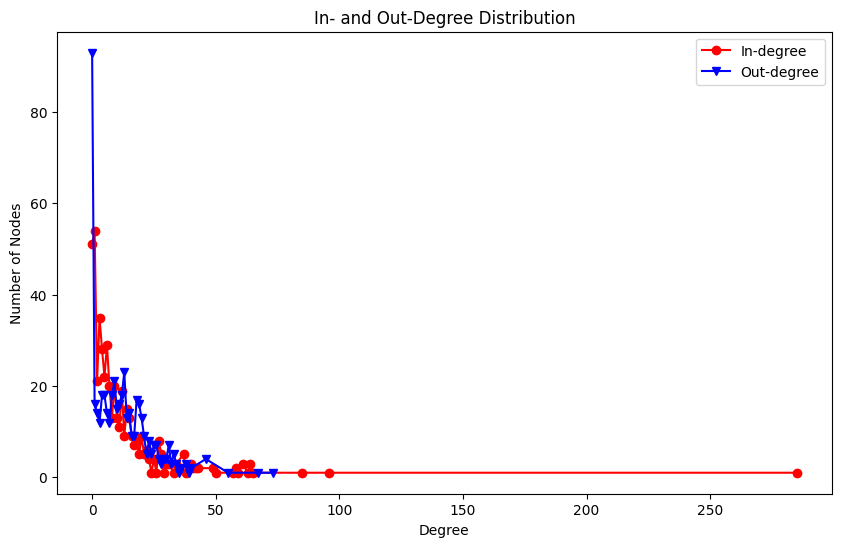

In [128]:
import matplotlib.pyplot as plt

in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# 3. Prepare data for plotting (get degree values and counts)
in_degree_values = sorted(set(in_degrees.values()))
in_hist = [list(in_degrees.values()).count(x) for x in in_degree_values]

out_degree_values = sorted(set(out_degrees.values()))
out_hist = [list(out_degrees.values()).count(x) for x in out_degree_values]

# 4. Plot the histograms
plt.figure(figsize=(10, 6))
plt.plot(in_degree_values, in_hist, marker='o', linestyle='-', color='red', label='In-degree')
plt.plot(out_degree_values, out_hist, marker='v', linestyle='-', color='blue', label='Out-degree')

plt.title('In- and Out-Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.legend()
plt.show()

Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?

In [129]:
# Print top 5 with most in-degrees:
top_in = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)
top_in[:5]

[('AllMusic', 285),
 ('Led_Zeppelin', 96),
 ('Bob_Dylan', 85),
 ('Queen', 65),
 ('John_Lennon', 64)]

In [130]:
top_out = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)
top_out[:5]

[('Alice_in_Chains', 73),
 ('Deep_Purple', 67),
 ('Black_Sabbath', 55),
 ('Metallica', 46),
 ('Def_Leppard', 46)]

What are the 10 pages with the longest wiki entries? (use the length of content attribute to figure this one out)?

In [131]:
# We find the 10 pages with longest wiki entries:
word_counts = nx.get_node_attributes(G, 'word_count')
top_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
top_word_counts[:10]

[('Bob_Dylan', 30646),
 ('Guns_N__Roses', 29684),
 ('Paul_McCartney', 27326),
 ('The_Beach_Boys', 26290),
 ('The_Rolling_Stones', 26186),
 ('Chicago', 25975),
 ('Europe', 25278),
 ('Elton_John', 24906),
 ('David_Bowie', 24905),
 ('U2', 24877)]

# Part 3: Visualizing the networks

*Exercise:* Let's build a simple visualization of the network
>1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
>   * *Note*: Keep the directed graph, we will use it in the following exercises.
>2. Use the NetworkX command `nx.spring_layout` or `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithms here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
>   * Set up your plot so that node-size depends on the node *degree*.
>   * Make the node color depend on the `length of content` attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do almost everything yourself. But it's OK to use an LLM for help with the coloring.
</div>

If you want to make things more fancy, note that Wikipedia writes that local minima is a problem for these graphs: "It is easy to see that force-directed algorithms produce a graph with minimal energy, in particular one whose total energy is only a local minimum. The local minimum found can be, in many cases, considerably worse than a global minimum, which translates into a low-quality drawing. For many algorithms, especially the ones that allow only down-hill moves of the vertices, the final result can be strongly influenced by the initial layout, that in most cases is randomly generated. The problem of poor local minima becomes more important as the number of vertices of the graph increases. **A combined application of different algorithms is helpful to solve this problem**. For example, using the Kamada–Kawai algorithm to quickly generate a reasonable initial layout and then the Fruchterman–Reingold algorithm to improve the placement of neighbouring nodes." (my emphasis) 

But don't worry if your network looks like a hairball (a.k.a a *ridiculogram*) for now, we'll dig deeper with visualization next time.

1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
   * *Note*: Keep the directed graph, we will use it in the following exercises.

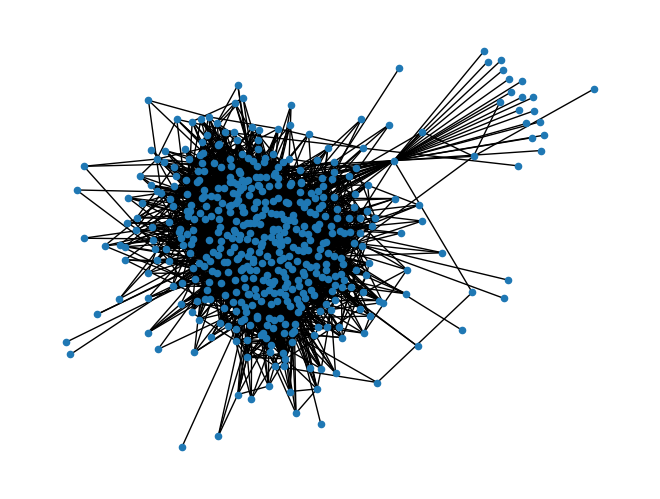

In [132]:
# Convert network G to undirected graph:
G_undirected = G.to_undirected()

nx.draw(G_undirected, node_size=20)

2. Use the NetworkX command `nx.spring_layout` or `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithms here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
   * Set up your plot so that node-size depends on the node *degree*.
   * Make the node color depend on the `length of content` attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)

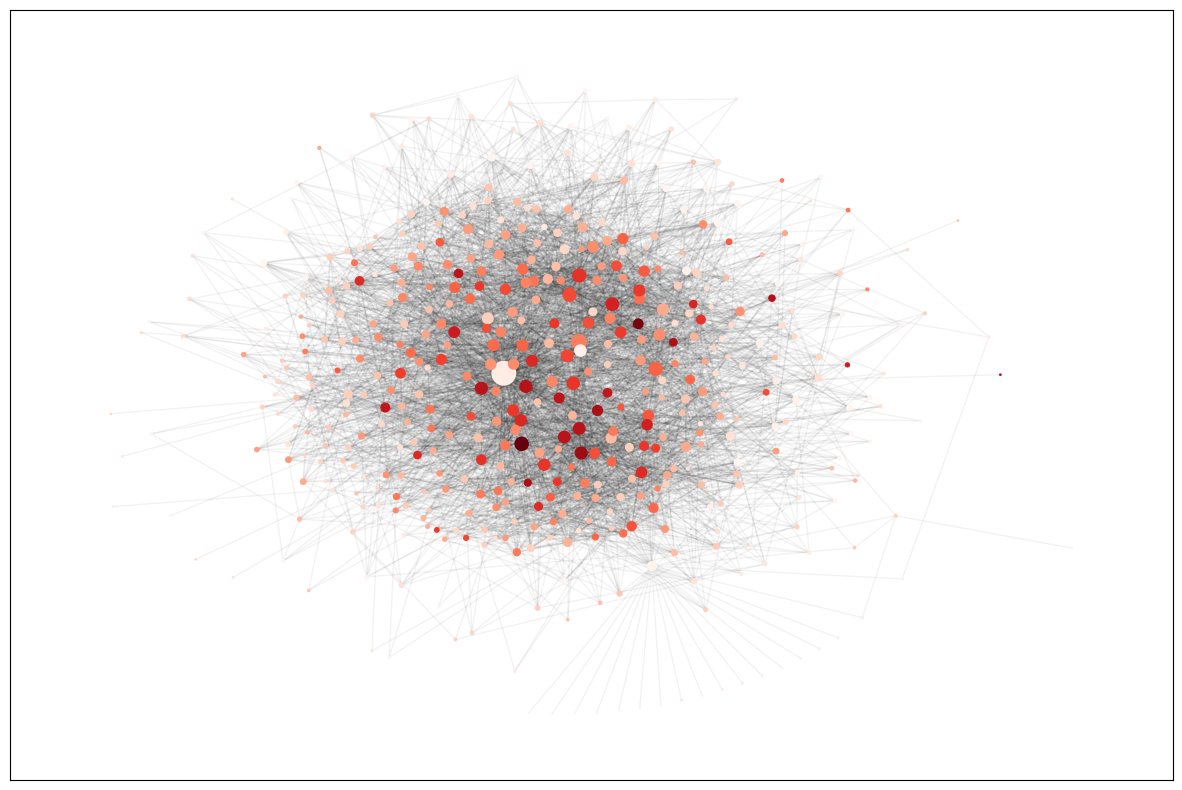

In [133]:
G_nodes = list(G_undirected.nodes())
G_degrees = [G_undirected.degree(node) for node in G_nodes]
# We would also like the word count for illustration purposes:
G_word_counts = [G_undirected.nodes[node]['word_count'] for node in G_nodes]

# Plot:
plt.figure(figsize=(15, 10))
pos = nx.kamada_kawai_layout(G_undirected)
nodes_drawn = nx.draw_networkx_nodes(G_undirected,
                                     pos,
                                     nodelist = G_nodes, 
                                     node_size=[d*1 for d in G_degrees],
                                     node_color=G_word_counts,
                                     cmap=plt.cm.Reds)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.05)
plt.show()

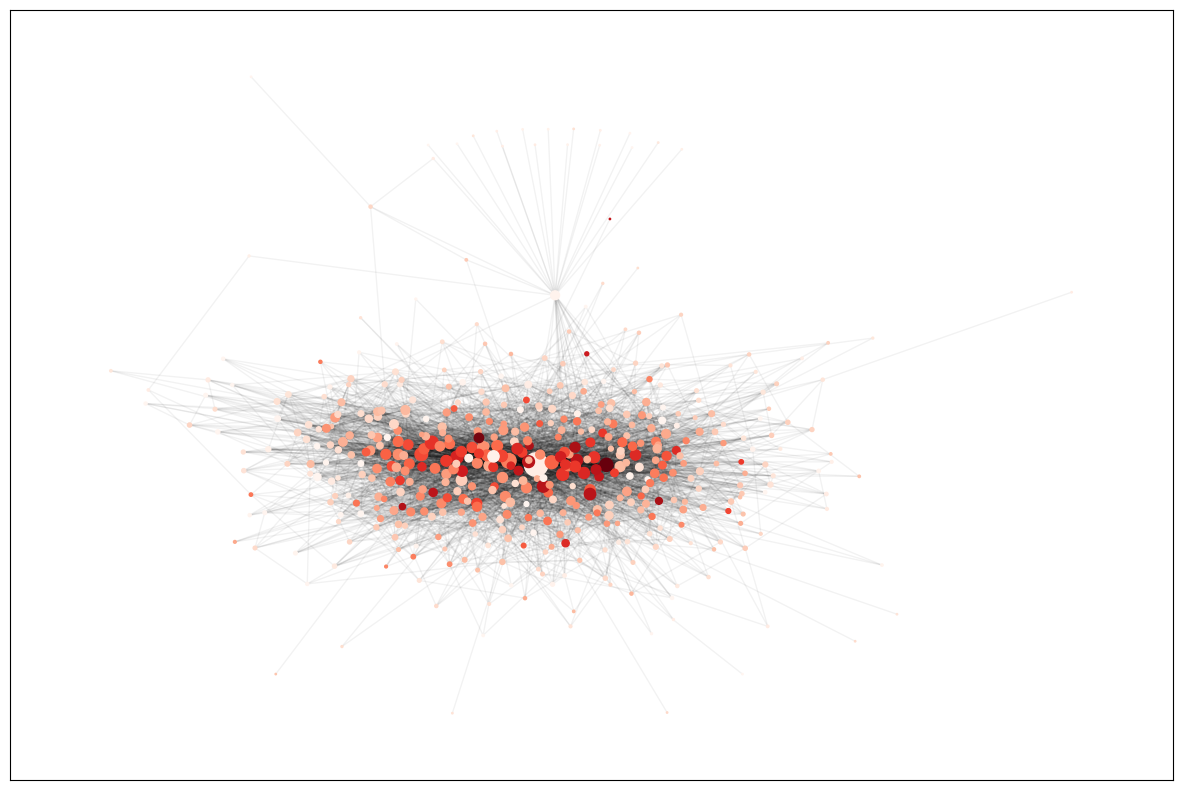

In [134]:
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G_undirected)
nodes_drawn = nx.draw_networkx_nodes(G_undirected,
                                     pos,
                                     nodelist = G_nodes, 
                                     node_size=[d*1 for d in G_degrees],
                                     node_color=G_word_counts,
                                     cmap=plt.cm.Reds)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.05)
plt.show()